<a href="https://colab.research.google.com/github/SuvoneathSvay/Mental-Wellness-vs-Screentime/blob/main/draft_(Jennie).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#cell1
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
DATA_PATH = '/content/ScreenTime vs MentalWellness.csv'

In [ ]:
#cell2
df = pd.read_csv(DATA_PATH)
print('Rows, Columns:', df.shape)
print(df.info())

Rows, Columns: (400, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      400 non-null    object 
 1   age                          400 non-null    int64  
 2   gender                       400 non-null    object 
 3   occupation                   400 non-null    object 
 4   work_mode                    400 non-null    object 
 5   screen_time_hours            400 non-null    float64
 6   work_screen_hours            400 non-null    float64
 7   leisure_screen_hours         400 non-null    float64
 8   sleep_hours                  400 non-null    float64
 9   sleep_quality_1_5            400 non-null    int64  
 10  stress_level_0_10            400 non-null    float64
 11  productivity_0_100           400 non-null    float64
 12  exercise_minutes_per_week    400 non-null    int64  


In [ ]:
#cell3
print(df.columns)


Index(['user_id', 'age', 'gender', 'occupation', 'work_mode',
       'screen_time_hours', 'work_screen_hours', 'leisure_screen_hours',
       'sleep_hours', 'sleep_quality_1_5', 'stress_level_0_10',
       'productivity_0_100', 'exercise_minutes_per_week',
       'social_hours_per_week', 'mental_wellness_index_0_100', 'Unnamed: 15'],
      dtype='object')


In [ ]:
#cell 4: high stress indicator
df['high_stress'] = (df['stress_level_0_10'] > 6).astype(int)
bins = [0,4,7,10,24]
labels = ['Low','Moderate','High','Very High']
df['screen_time_cat'] = pd.cut(df['screen_time_hours'], bins=bins, labels=labels)


df = df.loc[:, ~df.columns.str.contains('^Unnamed')]




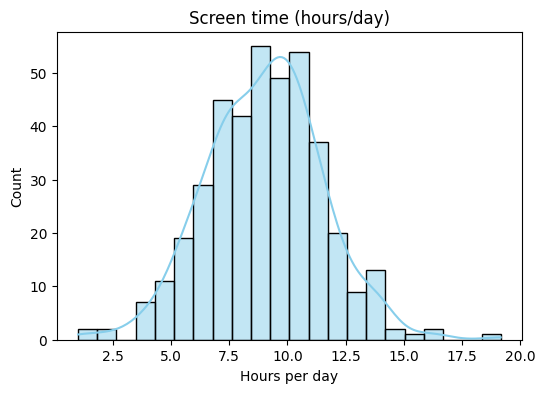

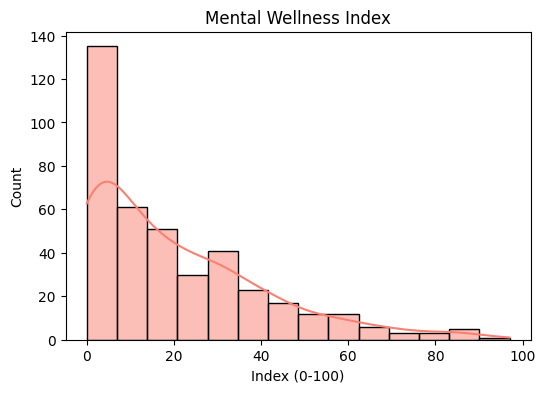

/tmp/ipython-input-2248945881.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='occupation', y='screen_time_hours', data=df, palette='Set2')


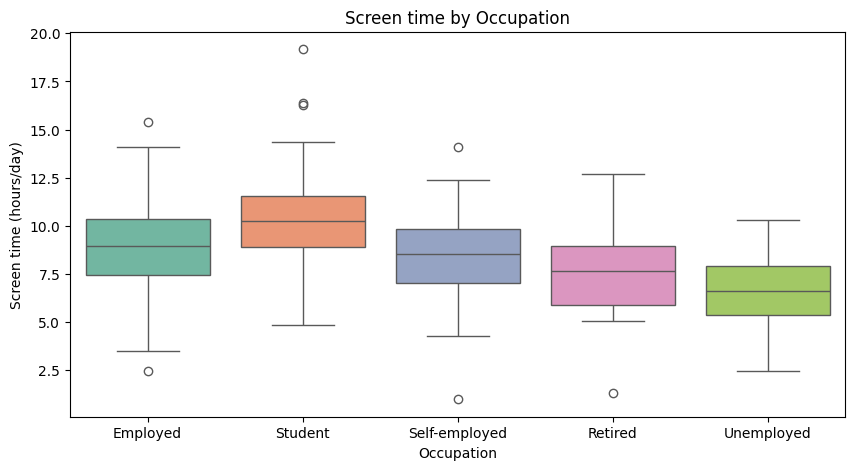

In [ ]:
#cell 5 visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram: Screen time
plt.figure(figsize=(6,4))
sns.histplot(df['screen_time_hours'], kde=True, color='skyblue')
plt.title('Screen time (hours/day)')
plt.xlabel("Hours per day")
plt.ylabel("Count")
plt.show()

# Histogram: Mental Wellness Index
plt.figure(figsize=(6,4))
sns.histplot(df['mental_wellness_index_0_100'], kde=True, color='salmon')
plt.title('Mental Wellness Index')
plt.xlabel("Index (0-100)")
plt.ylabel("Count")
plt.show()

# Boxplot: Screen time by Occupation
plt.figure(figsize=(10,5))
sns.boxplot(x='occupation', y='screen_time_hours', data=df, palette='Set2')
plt.title('Screen time by Occupation')
plt.xlabel("Occupation")
plt.ylabel("Screen time (hours/day)")
plt.show()


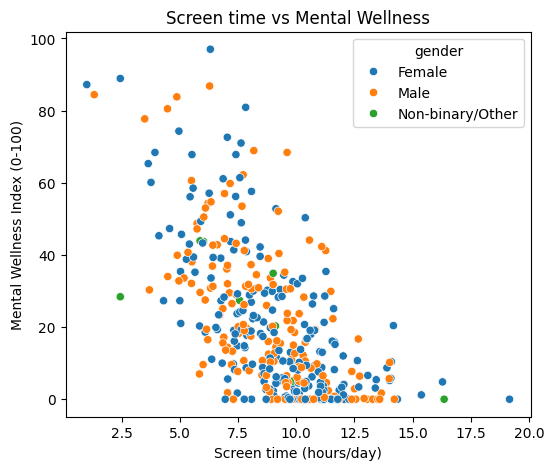

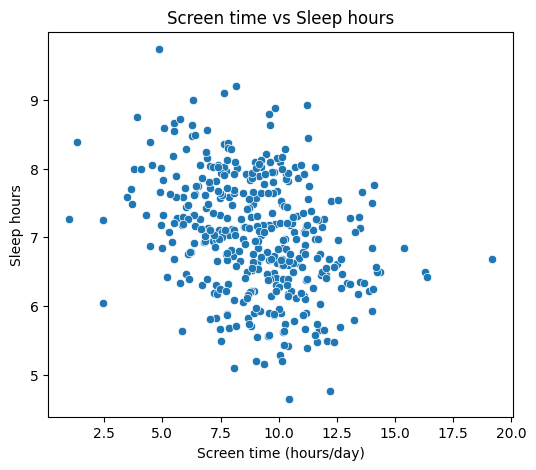

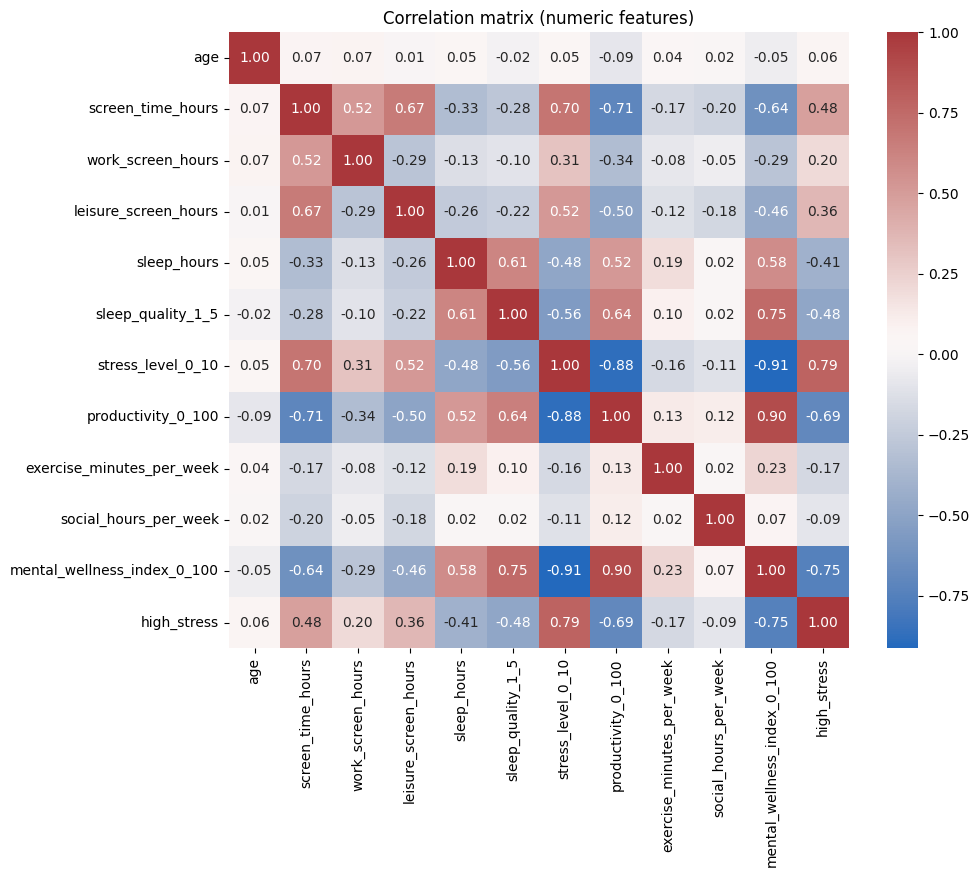

In [ ]:
#cell 6 relationships plots

# Scatterplot: Screen time vs Mental Wellness (by gender)
plt.figure(figsize=(6,5))
sns.scatterplot(x='screen_time_hours',
                y='mental_wellness_index_0_100',
                hue='gender', data=df)
plt.title('Screen time vs Mental Wellness')
plt.xlabel("Screen time (hours/day)")
plt.ylabel("Mental Wellness Index (0-100)")
plt.show()

# Scatterplot: Sleep vs Screen time
plt.figure(figsize=(6,5))
sns.scatterplot(x='screen_time_hours',
                y='sleep_hours', data=df)
plt.title('Screen time vs Sleep hours')
plt.xlabel("Screen time (hours/day)")
plt.ylabel("Sleep hours")
plt.show()

# Correlation heatmap (numeric features only)
plt.figure(figsize=(10,8))
num_df = df.select_dtypes(include=['float64','int64'])
cm = num_df.corr()
sns.heatmap(cm, annot=True, fmt='.2f', cmap='vlag')
plt.title('Correlation matrix (numeric features)')
plt.show()

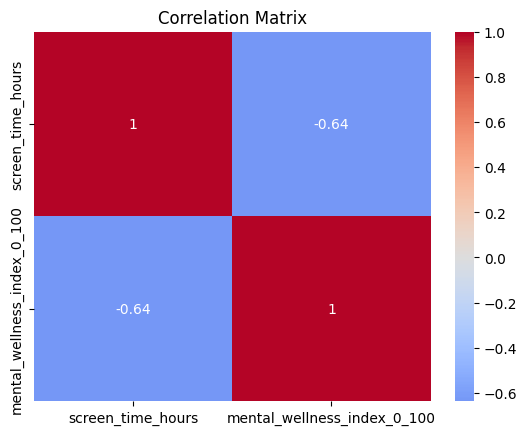

Pearson correlation: PearsonRResult(statistic=np.float64(-0.6359429863421295), pvalue=np.float64(1.021641961200768e-46))
Spearman correlation: SignificanceResult(statistic=np.float64(-0.6490367326934875), pvalue=np.float64(3.3410590120843907e-49))


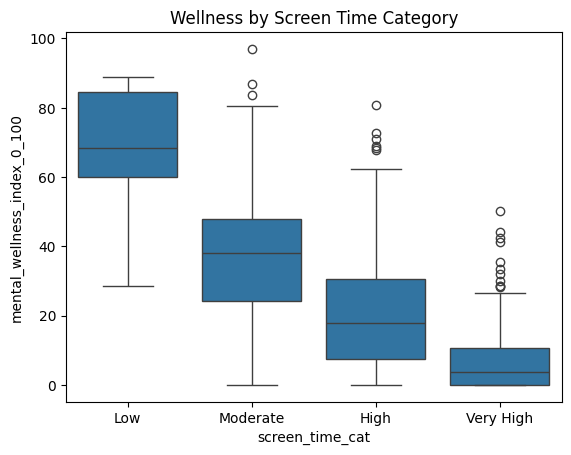

In [ ]:
# cell 7: statistical checks
#correlatioon between screen time and mental wellness

from scipy.stats import pearsonr, spearmanr
# Select numeric columns for correlation
corr = df[['screen_time_hours', 'mental_wellness_index_0_100']].corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
x = df['screen_time_hours']
y = df['mental_wellness_index_0_100']

plt.title("Correlation Matrix")
plt.show()

#shows linear relationship
pearson_result = pearsonr(x, y)
print("Pearson correlation:", pearson_result)

#shows ranking relationship
spearman_result = spearmanr(x, y)
print("Spearman correlation:", spearman_result)

#boxplot relationship between screen time and wellness
sns.boxplot(x='screen_time_cat', y='mental_wellness_index_0_100', data=df)
plt.title("Wellness by Screen Time Category")
plt.show()

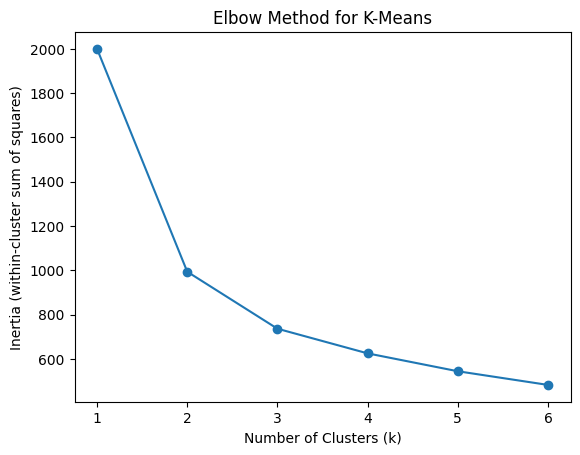

In [ ]:
#cell 8: clustering/Kmeans

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

cluster_features = [
    'screen_time_hours',
    'sleep_hours',
    'stress_level_0_10',
    'mental_wellness_index_0_100',
    'productivity_0_100'
]

# Step 3: Select those columns from the DataFrame and remove missing values
Xc = df[cluster_features].dropna()

# Step 4: Standardize the data (so all features are on the same scale)
scaler = StandardScaler()
Xc_scaled = scaler.fit_transform(Xc)

# Step 5: Use the "Elbow Method" to find the best number of clusters
inertia = []               # this will store how well clusters fit
k_values = range(1, 7)     # try cluster counts from 1 to 6

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Xc_scaled)
    inertia.append(kmeans.inertia_)  # save the result

# Step 6: Plot the results (Elbow Method)
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (within-cluster sum of squares)")
plt.title("Elbow Method for K-Means")
plt.show()

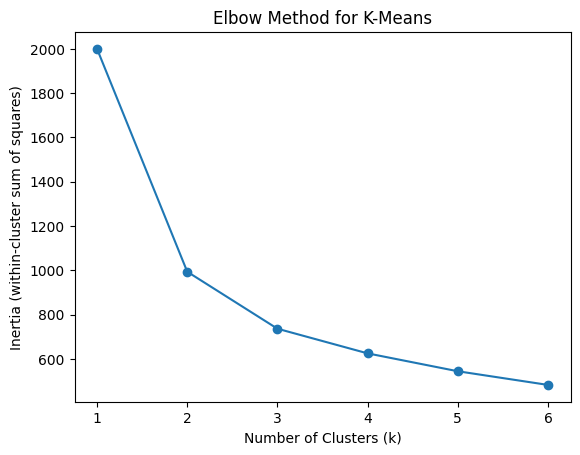

[[-1.10850627  1.04955007 -1.69631552  1.71868752  1.62219156]
 [-0.31355817  0.20373504 -0.06841431  0.07133584  0.1337476 ]
 [ 0.77069114 -0.63878633  0.7778061  -0.79003514 -0.8105046 ]]
         screen_time_hours  sleep_hours  stress_level_0_10  \
cluster                                                      
0                 6.267000     7.906714           4.601429   
1                 8.244785     7.186626           8.007362   
2                10.942335     6.469341           9.777844   

         mental_wellness_index_0_100  productivity_0_100  
cluster                                                   
0                          55.304286           78.641429  
1                          21.778528           56.312883  
2                           4.248503           42.147904  


In [ ]:
#cell 8: clustering/Kmeans

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

cluster_features = [
    'screen_time_hours',
    'sleep_hours',
    'stress_level_0_10',
    'mental_wellness_index_0_100',
    'productivity_0_100'
]

# Step 3: Select those columns from the DataFrame and remove missing values
Xc = df[cluster_features].dropna()

# Step 4: Standardize the data (so all features are on the same scale)
scaler = StandardScaler()
Xc_scaled = scaler.fit_transform(Xc)

# Step 5: Use the "Elbow Method" to find the best number of clusters
inertia = []               # this will store how well clusters fit
k_values = range(1, 7)     # try cluster counts from 1 to 6

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Xc_scaled)
    inertia.append(kmeans.inertia_)  # save the result

# Step 6: Plot the results (Elbow Method)
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (within-cluster sum of squares)")
plt.title("Elbow Method for K-Means")
plt.show()

# Suppose the elbow suggests k=3
best_k = 3
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(Xc_scaled)

# Add cluster labels back to the original DataFrame (aligned by index)
Xc['cluster'] = cluster_labels

# Inspect cluster centers (in scaled space)
print(kmeans_final.cluster_centers_)

# Optional: get descriptive stats per cluster
print(Xc.groupby('cluster').mean())


In [ ]:
#cell 9
from sklearn.impute import SimpleImputer
#simpleImputer: use this for numeric col to rplc
#missing values with mediun since ML cannot handle NaN(not a num) values directly.

from sklearn.preprocessing import OneHotEncoder
# OneHotEncoder: converts categorical variables into 0/1 dummy columns.
# One-hot encoding is a process that converts categorical variables (like "red," "blue," "green")
#into a numerical format for machine learning models.
#It creates a binary vector (a series of 0s and 1s) for each category,
#where only one element of the vector is "1" to represent the specific category, and all other elements are "0".
#This technique is crucial for nominal (unordered) categorical data
#because it avoids the false assumption of a numerical relationship between categories that could arise if they were simply represented by integers.


#Drop junk columns like "Unnamed"  # when columns of the df,it shows that there are 15 Unnamed, gonna use this to remove

df = df.drop(columns=['user_id'])

#Define target variable
Target = 'mental_wellness_index_0_100'
y = df[Target]
df = df.drop(columns=[Target])

# Separate numeric & categorical columns
#Splits features into numeric vs categorical lists
#This allows to handle missing values and encoding differently for each type.
num_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
cat_cols = df.select_dtypes(include=['category','object']).columns.tolist()


# Only keep numeric columns that are not fully NaN
#Drops any numeric column that is completely empty (all NaN), Keeps only meaningful numeric features
num_cols = [col for col in num_cols if not df[col].isna().all()]



# Numeric imputation (median)
#Replaces missing numeric values with the median of each column
imp_num = SimpleImputer(strategy='median')
if df[num_cols].isna().sum().sum() > 0:   # only if missing values exist
    df[num_cols] = pd.DataFrame(
        imp_num.fit_transform(df[num_cols]),
        columns=num_cols,
        index=df.index
    )

#Categorical imputation (fill with "Unknown")
#Forces each categorical column to be categorical dtype.
#Adds "Unknown" category if missing.
#Fills missing entries with "Unknown"
#Some people may have skipped answering occupation or work_mode.
#Instead of dropping them, we treat "Unknown" as a real category

for col in cat_cols:
    df[col] = df[col].astype("category")  # ensure categorical dtype
    if "Unknown" not in df[col].cat.categories:   # only add if not already there
        df[col] = df[col].cat.add_categories("Unknown")
    df[col] = df[col].fillna("Unknown")



# One-Hot Encode categorical columns
#Turns gender, occupation, work_mode into multiple 0/1 columns.
#Drops the first category (baseline) to prevent multicollinearity.
#Models like Linear Regression and KNN require all inputs to be numeric.

#Ignores unseen categories at prediction time.

encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")
encoded = encoder.fit_transform(df[cat_cols])


# Put encoded categorical features into DataFrame
#Converts the numpy array from OneHotEncoder into a labeled DataFrame.
# Keeps feature names like gender_Male, occupation_Student, to know which category is which.
encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(cat_cols),
    index=df.index
)

# Combine numeric + encoded categorical
#Merges numeric and encoded categorical back together
df_final = pd.concat([df[num_cols], encoded_df], axis=1)

df_final.head(20).style.set_table_styles(
    [{'selector': 'th, td',
      'props': [('border', '1px solid black')]}]
)



,age,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,high_stress,gender_Male,gender_Non-binary/Other,occupation_Retired,occupation_Self-employed,occupation_Student,occupation_Unemployed,work_mode_In-person,work_mode_Remote,screen_time_cat_Low,screen_time_cat_Moderate,screen_time_cat_Very High
0,33,10.790000,5.440000,5.350000,6.630000,1,9.300000,44.700000,127,0.700000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
1,28,7.400000,0.370000,7.030000,8.050000,3,5.700000,78.000000,74,2.100000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
2,35,9.780000,1.090000,8.690000,6.480000,1,9.100000,51.800000,67,8.000000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,42,11.130000,0.560000,10.570000,6.890000,1,10.000000,37.000000,0,5.700000,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
4,28,13.220000,4.090000,9.130000,5.790000,1,10.000000,38.500000,143,10.100000,1,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
5,28,9.830000,0.530000,9.300000,7.190000,1,10.000000,44.000000,71,10.300000,1,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,42,6.020000,2.820000,3.200000,7.440000,2,6.100000,64.800000,141,4.700000,1,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
7,36,6.210000,0.750000,5.460000,6.780000,2,5.400000,87.000000,51,18.700000,0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
8,26,6.280000,0.670000,5.610000,8.480000,4,1.600000,91.700000,149,10.100000,0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
9,34,9.370000,0.840000,8.530000,7.780000,2,10.000000,42.200000,50,12.700000,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
#cell 11

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

target = 'mental_wellness_index_0_100'
y = df[target]
X = df.drop(columns=[target, 'high_stress'], errors='ignore')

# Initialize the scaler
scaler = StandardScaler()

# Fit on the data and transform
X_scaled = scaler.fit_transform(X)

# (Optional) If you want to keep the column names after scaling:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('\nLinear Regression Metrics:')
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('MAE:', mean_absolute_error(y_test, y_pred_lr))
print('R2:', r2_score(y_test, y_pred_lr))

# Model 2: Random Forest Regressor
rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('\nRandom Forest Metrics:')
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print('MAE:', mean_absolute_error(y_test, y_pred_rf))
print('R2:', r2_score(y_test, y_pred_rf))

# Model 3: Support Vector Regressor
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
print('\nSupport Vector Regressor Metrics:')
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_svr)))
print('MAE:', mean_absolute_error(y_test, y_pred_svr))
print('R2:', r2_score(y_test, y_pred_svr))

# Feature importances
fi = pd.Series(rf.feature_importances_, index = X_scaled.columns).sort_values(ascending=False)
print('\nFeature importances (RF):')
print(fi)

plt.figure(figsize=(8,4))
fi.plot(kind='bar')
plt.title('Feature importances')
plt.show()

NameError: name 'X' is not defined

In [ ]:

#cell10

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

Target = 'mental_wellness_index_0_100'
y = df['Target']
X = df.drop(columns=[Target, 'high_stress'], errors='ignore')

scaler = StandardScaler()
xc_scaled = scaler.fit_transform(df)
X_scaled = pd.df(X_scaled, columns=df.columns, index=df.index)

#x = df_final
#df = df.drop(columns=[Target])
#y = df['mental_wellness_index_0_100']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('\nLinear Regression Metrics:')
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('MAE:', mean_absolute_error(y_test, y_pred_lr))
print('R2:', r2_score(y_test, y_pred_lr))

# Model 2: Random Forest Regressor
rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('\nRandom Forest Metrics:')
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print('MAE:', mean_absolute_error(y_test, y_pred_rf))
print('R2:', r2_score(y_test, y_pred_rf))

# Model 3: Support Vector Regressor
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
print('\nSupport Vector Regressor Metrics:')
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_svr)))
print('MAE:', mean_absolute_error(y_test, y_pred_svr))
print('R2:', r2_score(y_test, y_pred_svr))

# Feature importances
fi = pd.Series(rf.feature_importances_, index = X).sort_values(ascending=False)
print('\nFeature importances (RF):')
print(fi)

plt.figure(figsize=(8,4))
fi.plot(kind='bar')
plt.title('Feature importances')
plt.show()

KeyError: 'Target'


Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.97      1.00      0.98        65

    accuracy                           0.97        80
   macro avg       0.99      0.93      0.96        80
weighted avg       0.98      0.97      0.97        80

Accuracy: 0.975
ROC AUC: 1.0

Classifier Feature importances:
stress_level_0_10            0.501976
productivity_0_100           0.177229
sleep_hours                  0.069253
screen_time_hours            0.068780
sleep_quality_1_5            0.049730
work_screen_hours            0.023632
screen_time_cat_Moderate     0.022349
leisure_screen_hours         0.021033
social_hours_per_week        0.020000
exercise_minutes_per_week    0.012180
age                          0.008782
screen_time_cat_Very High    0.007219
screen_time_cat_Low          0.005184
occupation_Unemployed        0.003791
gender_Male                  0.002971
occupat

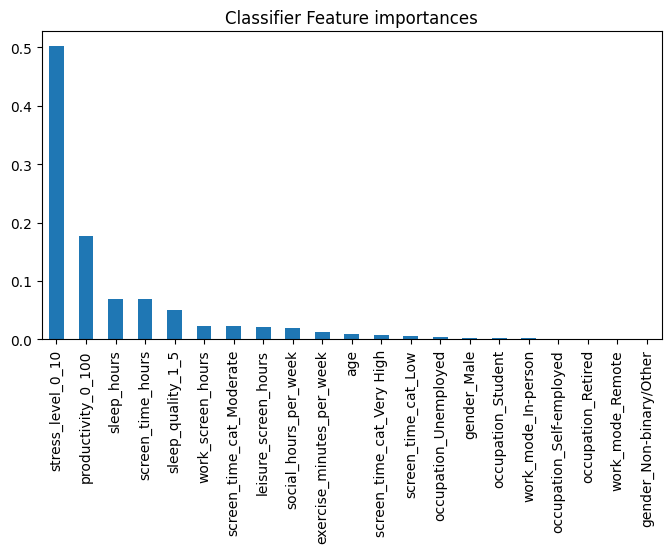

In [ ]:
#cell 11: baselines classification/ predict high-stress

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

data_df2 = df_final.drop(['high_stress'], axis = 1)
clf_features = data_df2.columns.tolist()
Xc = data_df2
yc = df['high_stress']
Xtr, Xte, ytr, yte = train_test_split(Xc, yc, test_size=0.2, random_state=42)

# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
rfc.fit(Xtr, ytr)
yp = rfc.predict(Xte)
yp_prob = rfc.predict_proba(Xte)[:,1]

print('\nRandom Forest Classifier Report:')
print(classification_report(yte, yp))
print('Accuracy:', accuracy_score(yte, yp))
try:
    print('ROC AUC:', roc_auc_score(yte, yp_prob))
except Exception:
    pass

# Feature importance for classifier
fi_clf = pd.Series(rfc.feature_importances_, index=clf_features).sort_values(ascending=False)
print('\nClassifier Feature importances:')
print(fi_clf)

plt.figure(figsize=(8,4))
fi_clf.plot(kind='bar')
plt.title('Classifier Feature importances')
plt.show()

In [ ]:
#cell12
from sklearn.model_selection import cross_val_score

def evaluate_with_cv(name, model, X, y, cv=5):

    r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

    rmse_scores = -cross_val_score(model, X, y, cv=cv, scoring='neg_root_mean_squared_error')

    mae_scores = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')

    RandomForestRegressor


    print(f"\n{name} CV Results ({cv}-fold):")
    print(f"R²:   {r2_scores.mean():.4f} (± {r2_scores.std():.4f})")
    print(f"RMSE: {rmse_scores.mean():.4f}")
    print(f"MAE:  {mae_scores.mean():.4f}")

evaluate_with_cv("Linear Regression", lr, X, y, cv=5)
evaluate_with_cv("Random Forest", rf, X, y, cv=5)
evaluate_with_cv("SVR Regressor", svr, X, y, cv=5)


NameError: name 'lr' is not defined